# Travail 1 - Kepler et Runge-Kutta 4

## Introduction

Nous allons dans ce travail étudier la dynamique newtonienne du système Terre-Lune, en résolvant numériquement les équations de Newton. Nous prendrons pour conditions initiales dans le repère de la Terre que la Lune passe à son périgée ($362600000{\rm m}$) à une vitesse de $1083.4{\rm m/s}$. Nous vérifierons que la trajectoire est une ellipse et présenterons les paramètres calculés pour cette ellipse. Ensuite, nous nous intéresserons à l'ordre de convergence de la méthode utilisée. Enfin, nous étudierons la trajectoire d'un astéroïde qui traverse le centre de l'ellipse avec une vitesse $(v_x,v_y)=(-500{\rm m/s},500 {\rm m/s})$ lorsque la Lune est à son apogée.

## Système Terre - Lune

### Paramètres et conditions initiales

Tout d'abord, importons les librairies utiles à notre travail.

In [15]:
import numpy
from math import log
from matplotlib import pyplot
%matplotlib inline

Ensuite, entrons les données caractéristiques du système. $T$ est la durée durant laquelle nous voulons simuler les trajectoires de la lune et de la Terre et $N$ est le paramètre qui définit le nombre de lignes des matrices de données de chaque astre.

In [60]:
T = 3600*24*30
dt = 10
N = 1+int(T/dt)

mT = 5.972*10**24
mL = 7.348*10**22
G = 6.67408*10**-11

Nous savons qu'une force gravitationnelle (force attractive) existe entre la Terre et la lune. Selon la loi de Newton, celle-ci s'écrit 

$${\bf F}_{L,T}=-{\bf F}_{T,L}=-Gm_T m_L\dfrac{{\bf x_L}-{\bf x_T}}{(x_L-x_T)^3}$$

pour deux masses $m_L$ et $m_T$ s'attirant avec des forces mutuellement opposées séparées d'une distance $r$ qui est la norme du vecteur partant du centre de la Terre jusqu'au centre de la lune. Nos conditions initiales étant données dans le repère de la Terre, nous allons résoudre les équations de Newton dans le repère de la Terre également. Nous avons donc besoin de reformuler notre équation avec comme variable le vecteur ${\bf r} = {\bf x_L}-{\bf x_T}$. 

$$ {\bf \ddot{r}_{LT}} = {\bf \ddot{x}_L}-{\bf \ddot{x}_T} = \frac{1}{m_L}{\bf F}_{L,T} - \frac{1}{m_T}{\bf F}_{T,L} = -Gm_T \dfrac{{\bf x_L}-{\bf x_T}}{(x_L-x_T)^3} - Gm_L\dfrac{{\bf x_L}-{\bf x_T}}{(x_L-x_T)^3}$$

Ce qui devient

$$ {\bf \ddot{r}_{LT}} = -G(m_T+m_L)\dfrac{{\bf r_{LT}}}{r_{LT}^3} $$

Nous allons tout d'abord transformer l'équation de Newton, qui est du deuxième ordre, en un système de deux équations du premier ordre. Pour ce faire, nous introduisons le vectreur $u_{LT} $ définit comme 

$$ u_{LT}  = \begin{pmatrix} x_{LT}\ , y_{LT}\ , v_{LT,x}\ , v_{LT,y}\end{pmatrix} $$

Notre système d'équations différentielles devient

$$ \dot{u}_{LT} = f(u_{LT}) $$ 

Nous obtenons donc

$$ f(u_{LT}) = \begin{pmatrix} v_{LT,x}\ , v_{LT,y}\ , -\dfrac{ m_T\, G\, x_{LT}}{ \left[x_{LT}^2 + y_{LT}^2\right]^{3/2}}\ , -\dfrac{ m_T\, G\, y_{LT}}{ \left[x_{LT}^2 + y_{LT}^2\right]^{3/2}}  \end{pmatrix} $$

Encodons à présent les conditions initiales. Nous nommons $dataLT$ la matrice de données de la lune dans le repère de la Terre. Elle comporte quatre colonnes. Chaque ligne se présentera comme $ u_{LT}  = \begin{pmatrix} x_{LT}\ , y_{LT}\ , v_{LT,x}\ , v_{LT,y}\end{pmatrix} $.

In [61]:
dataLT = numpy.empty((N,4)) 

# dataL0 = [362600000,0,0,1083.4*mT/(mT+mL)]
# dataT0 = [0,0,0,-1083.4*mL/(mT+mL)] #1083.4349740009823

dataLT0 = [362600000,0,0,1083.4349740009823]

dataLT[0] = dataLT0

### "Fonction d'évolution"

Nous ne généraliserons pas la fonction $f$ à plus de deux corps, par soucis de lisibilité car cela n'est pas nécessaire.
La première ligne de $out$ est la trajectoire de la Terre, la seconde celle de la Lune.

In [62]:
def f(uLT): 
    return numpy.array([uLT[2],uLT[3],-G*(mT+mL)*uLT[0]/(uLT[0]**2+uLT[1]**2)**(3/2),\
                        -G*(mT+mL)*uLT[1]/(uLT[0]**2+uLT[1]**2)**(3/2)])     

### Implémentation de Runge Kutta 4

Ci-dessous la méthode "Runge Kutta 4" appliquée directement à la trajectoire de la Lune.

In [63]:
def rk4(f,uLT,dt): 
    k1 = f(uLT)
    k2 = f(uLT+dt/2*k1)
    k3 = f(uLT+dt/2*k2)
    k4 = f(uLT+dt*k3)
    
    return uLT+dt/6*(k1+2*k2+2*k3+k4)

### Calcul de la trajectoire

Calculons maintenant la trajectoire. Notons que $dataL[t]$ est le vecteur $u_L$ au temps $t$ qui est l'input de $f$ (idem pour $dataT[t]$).

In [64]:
for t in range(1,N):
    
    dataLT[t] = rk4(f,dataLT[t-1],dt)

Affichons la position de la lune dans le repère de la Terre

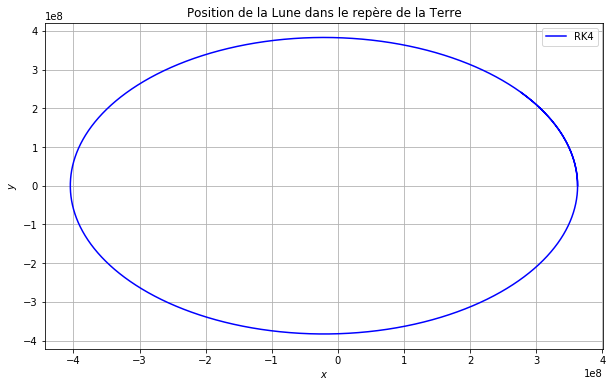

In [65]:
pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(dataLT[:,0],dataLT[:,1], 'b-', label='RK4')
pyplot.title('Position de la Lune dans le repère de la Terre')
pyplot.legend();
pyplot.show();

### Paramètres : grand et petit axes, excentricité et période

In [66]:
def computeParameters(posEllipse):
    a = 1/2*(numpy.max(posEllipse[:,0])-numpy.min(posEllipse[:,0]))
    b = 1/2*(numpy.max(posEllipse[:,1])-numpy.min(posEllipse[:,1]))
    e = numpy.sqrt(1-b**2/a**2)
    return numpy.array([a,b,e])

In [67]:
parameters = computeParameters(dataLT)

a = parameters[0]
b = parameters[1]
e = parameters[2]

print("a =", a)
print("b =", b)
print("e =", e)

a = 383663116.433
b = 383084497.255
e = 0.0549000295925


In [68]:
# Compute the parameters a,b,e

minX = 0
for i in range(1,N-1):
    if (dataLT[i+1,0]>=dataLT[i,0] and dataLT[i,0]<dataLT[i-1,0]):
        minX = dataLT[i,0]
        break
        
maxX = 0
for i in range(1,N-1):
    if (dataLT[i+1,0]<=dataLT[i,0] and dataLT[i,0]>dataLT[i-1,0]):
        maxX = dataLT[i,0]
        break

minY = 0
for i in range(1,N-1):
    if (dataLT[i+1,1]>=dataLT[i,1] and dataLT[i,1]<dataLT[i-1,1]):
        minY = dataLT[i,1]
        break
        
maxY = 0
for i in range(1,N-1):
    if (dataLT[i+1,1]<=dataLT[i,1] and dataLT[i,1]>dataLT[i-1,1]):
        maxY = dataLT[i,1]
        break
        
print("minX =", minX)
print("maxX =", maxX)
print("minY =", minY)
print("maxY =", maxY)
        
a = abs(maxX-minX)/2
b = abs(maxY-minY)/2
e = numpy.sqrt(1-b**2/a**2)

print("a =", a)
print("b =", b)
print("e =", e)

minX = -404726232.867
maxX = 362599999.995
minY = -383084497.255
maxY = 383084497.254
a = 383663116.431
b = 383084497.255
e = 0.0549000294758


In [71]:
# This method will not work for negatives initial conditions

for i in range(2,N-1):
    if (dataLT[i+1,0]<=dataLT[i,0] and dataLT[i,0]>dataLT[i-1,0]):
        period = i*dt
        break
        
print("period in seconds =", period)
print("period in 24h-days =", period/24/3600)

period in seconds = 2350680
period in 24h-days = 27.206944444444446


Trouvons à présent l'apogée de l'orbite de la Lune autour de la Terre.

In [ ]:
for i in range(1,N-1):
    if (posLT[i+1,0]<=posLT[i,0] and posLT[i,0]>posLT[i-1,0]):
        indexApoL = i
        break

#nouvelles conditions initiales pour T, L
newInitL = dataL[indexApoL]
newInitT = dataT[indexApoL]

## Order of convergence

In [ ]:
def get_diffgrid(data_current, data_fine, dt):
    
    N_current = len(data_current[:,0])
    N_fine = len(data_fine[:,0])
   
    grid_size_ratio = int(numpy.ceil(N_fine/N_current))
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            data_current[:,0]- data_fine[::grid_size_ratio,0])) 
    
    return diffgrid

In [ ]:
def get_diffgrid(data_current, data_fine, dt):
    
    parameters_current = computeParameters(data_current)
    parameters_fine = computeParameters(data_fine)
    
    diffgrid = abs(parameters_current[0]-parameters_fine[0])
    
    return diffgrid

In [ ]:
# Show the order of the method

r = 2
h = 10

dt_values = numpy.array([h, r*h, r**2*h, r**3*h,r**4*h,r**5*h,r**6*h,r**7*h,r**8*h])

#dt_values = numpy.array([1000,300,100,30,10])  #,3,1
dataL_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N2 = int(T/dt)+1
        
    dataL = numpy.empty((N2, 4))
    dataT = numpy.empty((N2, 4))
    
    dataL[0] = dataL0
    dataT[0] = dataT0

    for t in range(1,N2):
        W = rk4(f, dataT[t-1], dataL[t-1], dt)
        dataT[t] = W[0]
        dataL[t] = W[1]
    
    dataL_values[i] = dataL

In [ ]:
# Compute the differences

diffgridL = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    diffgridL[i] = get_diffgrid(dataL_values[i], dataL_values[0], dt)

In [ ]:
print(diffgridL)

In [ ]:
alpha = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i in range(0, len(dt_values)-2):
    
    alpha[i] = (log(get_diffgrid(dataL_values[i+2], dataL_values[i+1], dt_values[i+2])) 
             - log(get_diffgrid(dataL_values[i+1], dataL_values[i], dt_values[i+1]))) / log(r)

print(alpha)

In [ ]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=18)
pyplot.ylabel(r'$L_1$-norm of the grid differences', fontsize=18)
pyplot.xlim(1e-4,1)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(dt_values[1:], diffgridL[1:], color='k', ls='--', lw=2, marker='o');

## Système Terre - Lune - astéroïde

A présent, la partie avec l'astéroïde. Il faut tout d'abord repéré le centre de l'ellipse parcourue par la lune autour de la Terre qui est dans son repère au repos.

In [ ]:
# Find the ellipse LT's center
Xcenter = (maxX+minX)/2
Ycenter = (maxY+minY)/2

In [ ]:
# NEW f ast

def f_ast(uT,uL,uA): 
    out = numpy.empty((3,4))  
    out[0] = numpy.array([uT[2],uT[3],-G*mL*(uT[0]-uL[0])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2),\
                          -G*mL*(uT[1]-uL[1])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2)])     
    out[1] = numpy.array([uL[2],uL[3],-G*mT*(uL[0]-uT[0])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2),\
                          -G*mT*(uL[1]-uT[1])/((uT[0]-uL[0])**2+(uT[1]-uL[1])**2)**(3/2)])
    out[2] = numpy.array([uA[2],uA[3],-G*mT*(uA[0]-uT[0])/((uT[0]-uA[0])**2+(uT[1]-uA[1])**2)**(3/2)\
                          -G*mL*(uA[0]-uL[0])/((uL[0]-uA[0])**2+(uL[1]-uA[1])**2)**(3/2),\
                          -G*mT*(uA[1]-uT[1])/((uT[0]-uA[0])**2+(uT[1]-uA[1])**2)**(3/2)\
                          -G*mL*(uA[1]-uL[1])/((uL[0]-uA[0])**2+(uL[1]-uA[1])**2)**(3/2)])
    return out

In [ ]:
# NEW rk4 ast
def rk4_ast(f,u,v,w,dt): 
    k1 = f(u,v,w)
    k2 = f(u+dt/2*k1[0,:],v+dt/2*k1[1,:],w+dt/2*k1[2,:])
    k3 = f(u+dt/2*k2[0,:],v+dt/2*k2[1,:],w+dt/2*k2[2,:])
    k4 = f(u+dt*k3[0,:],v+dt*k3[1,:],w+dt*k3[2,:])
    
    out = numpy.empty((3,4))
    out[0] = u+dt/6*(k1[0,:]+2*k2[0,:]+2*k3[0,:]+k4[0,:])
    out[1] = v+dt/6*(k1[1,:]+2*k2[1,:]+2*k3[1,:]+k4[1,:])
    out[2] = w+dt/6*(k1[2,:]+2*k2[2,:]+2*k3[2,:]+k4[2,:])
    return out

Trouvons l'instant *t_apL* où la lune est à l'apogée de sa trajectoire autour de la Terre qui est dans son repère au repos. Nous avons positionné les axes de sorte que l'apogée se trouve sur l'axe des abscisses.

In [ ]:
#NEW ast
T = 3600*24*3
dt = 100
N = 1+int(T/dt)

mT = 5.972*10**24
mL = 7.348*10**22
G = 6.67408*10**-11

dataL = numpy.empty((N,4)) 
dataT = dataL.copy()
dataA = dataL.copy()

dataL[0] = newInitL # conditions initiales
dataT[0] = newInitT
dataA[0] = [Xcenter, Ycenter,-3000,1500]

In [ ]:
for t in range(1,N):
    W = rk4_ast(f_ast,dataT[t-1],dataL[t-1],dataA[t-1],dt)
    dataT[t] = W[0]
    dataL[t] = W[1]
    dataA[t] = W[2]
    
posLT = dataL[:,0:2] - dataT[:,0:2] #position de la lune dans le repère de la Terre
posAT = dataA[:,0:2] - dataT[:,0:2] #position de l'astéroïde dans le repère de la Terre

In [ ]:
# Plot the position of the moon and the earth in the initial frame

pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(dataL[:,0],dataL[:,1], 'b-', label='RK4')
pyplot.plot(dataT[:,0],dataT[:,1], 'b-', label='RK4')
pyplot.plot(dataA[:,0],dataA[:,1], 'r-', label='RK4')
pyplot.title('Positions of the asteroïd, the moon and the earth in the initial frame')
pyplot.legend();
pyplot.show();

In [ ]:
# Plot the position of the moon and the asteroïd in the rest frame of the earth

pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(posLT[:,0],posLT[:,1], 'b-', label='RK4')
pyplot.plot(posAT[:,0],posAT[:,1], 'r-', label='RK4')
pyplot.title('Positions of the moon and the asteroïd in the rest frame of the earth')
pyplot.legend();
pyplot.show();

In [ ]:
dataL[:,0]

### Animations des trajectoires

In [ ]:
from matplotlib import animation
from IPython.display import HTML

def animate_LT(i):
    x = numpy.linspace(0,100,len(data))
    y = data
    line.set_dataL(x,y)
    return line,

fig = pyplot.figure()
ax = pyplot.axes(xlim=(-500000000,500000000),ylim=(-500000000,500000000),xlabel=('x'),ylabel=('y'))

line, = ax.plot([],[],color='#003366', lw=2)

anim = animation.FuncAnimation(fig, animate_LT,interval=1000,frames=period)
#HTML(anim.to_html5_video())
pyplot.show()

In [ ]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()